# Customer Churn Analysis Project
__________


## Load and Check Data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv('Main Sample.csv')

In [3]:
df.shape

(9980, 16)

In [4]:
df.columns

Index(['CustomerId', 'CreditScore', 'Location', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCreditCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

In [5]:
df.head()

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
df.dtypes

CustomerId              int64
CreditScore             int64
Location               object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCreditCard           int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [7]:
# check for missing values
df.isna().sum()

CustomerId            0
CreditScore           0
Location              0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCreditCard         0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
# remove `CustomerID` column as we will not need it
df.drop('CustomerId', axis=1, inplace=True)

## Task A

### 1. What is the proportion of the customers that are still using the banking services compared to those that have left in the period covered in the dataset? Is there a significant difference in the proportion that the bank authority should be worried about?

In [9]:
df.Exited.value_counts()

0    7949
1    2031
Name: Exited, dtype: int64

In [10]:
df.Exited.value_counts().sum()

9980

#### There are total 9980 customers in the dataset. 7949 of them indicated as __Not-Exited__ and 2031 exited!

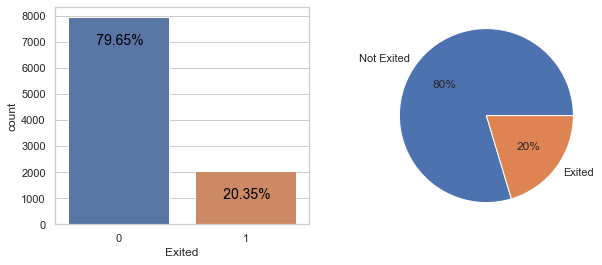

In [11]:
fig, axs = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(x = 'Exited', data=df, ax=axs[0])

for p in axs[0].patches:
    axs[0].annotate(f'\n              {round(100*p.get_height()/len(df),2)}%', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=14)
axs[1] = plt.pie(x = df['Exited'].value_counts(), labels = ['Not Exited', 'Exited'], autopct='%.0f%%')
plt.show()

### 2. What is the relationship between the number of complaints received by the bank authorities and the number of exited customers?

In [12]:
features = df.columns
features = features.drop(['Exited'])
df.groupby('Exited')[features].mean().style.background_gradient(cmap = 'Blues')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned
Exited,,,,,,,,,,,
0,651.790288,37.403950,5.032709,72782.750469,1.543842,0.707133,0.554409,99745.044403,0.001258,3.018115,607.047679
1,645.704579,44.826194,4.930576,91163.465790,1.474151,0.698671,0.360414,101451.560128,0.998031,2.995569,604.494338


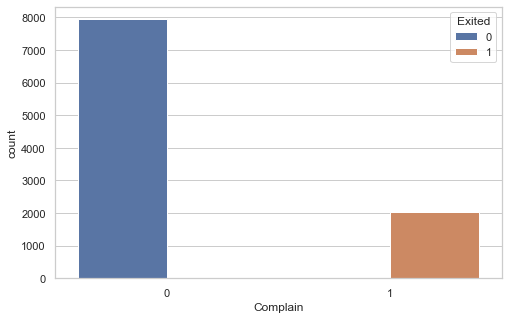

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Complain', data=df, hue = 'Exited')
plt.show()

In [14]:
by_complain = df.groupby(['Complain'])['Exited'].value_counts(normalize=True).to_frame().rename(columns={'Exited': 'ratio'}).reset_index().sort_values('Complain')
by_complain

,Complain,Exited,ratio
0,0,0,0.999496
1,0,1,0.000504
2,1,1,0.995091
3,1,0,0.004909


In [15]:
df[['Exited', 'Complain']].corr()

,Exited,Complain
Exited,1.000000,0.995679
Complain,0.995679,1.000000


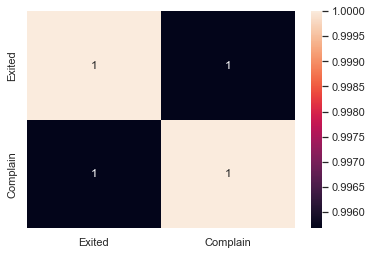

In [16]:
sns.heatmap(df[['Exited', 'Complain']].corr(), annot=True)
plt.show()

### 3. What are the characterisitcs and statistics (in terms of gender, age groups, and tenure etc) of the customers that are more likely to complain? Provide an informative profile description of those type of customers.

In [17]:
# Numerical features
features = df.columns
features = features.drop(['Complain', 'Exited'])
df.groupby('Complain')[features].mean().style.background_gradient(cmap = 'Blues')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned
Complain,,,,,,,,,,
0,651.806244,37.410550,5.031852,72758.511292,1.543497,0.707164,0.554073,99744.261955,3.017374,606.849679
1,645.660285,44.778596,4.934217,91203.842568,1.475700,0.698576,0.362297,101449.584620,2.998527,605.273932


#### We see that there are some differences in mean values of features for those who complained and those who didn't. Let's see it in details

#### By numerical variables: Age, Balance, EstimatedSalary, CreditScore, Point Earned

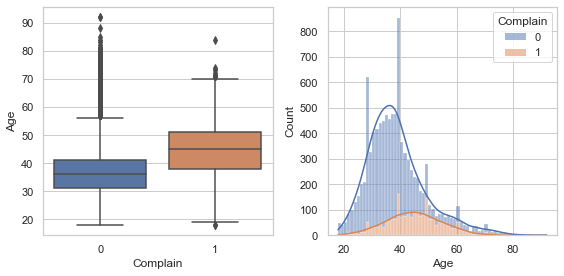

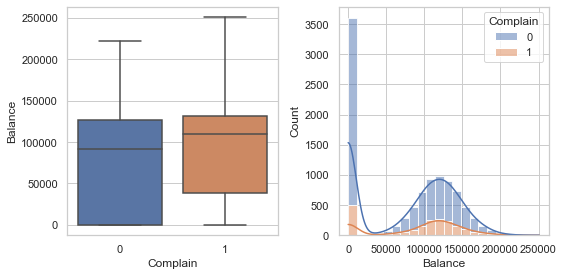

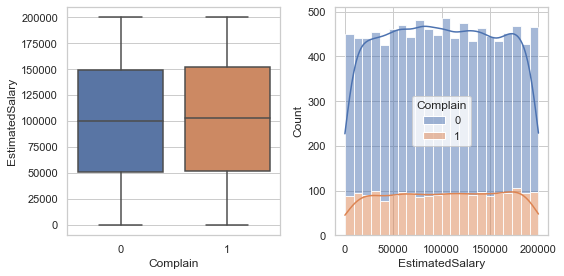

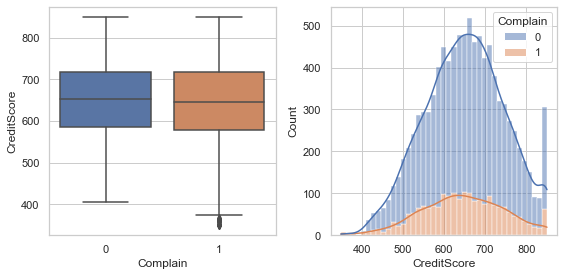

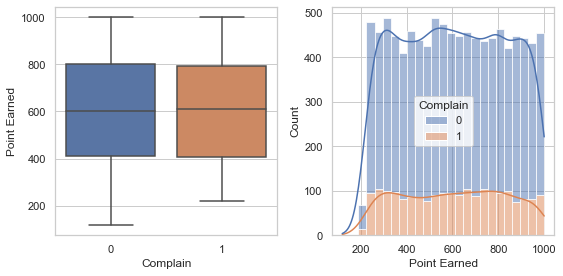

In [18]:
for i in ['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Point Earned']:
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    sns.boxplot(y=i, x='Complain', data=df, ax=axs[0])
    sns.histplot(data=df, x=i, hue='Complain', kde=True, multiple='stack', ax=axs[1])
    plt.tight_layout()
    plt.show()

#### From the charts above we can clearly see that there's a significant difference in the number of Complains between customers of __Age groups__. Let's find that groups.

In [19]:
df[df['Complain'] ==1].Age.describe()

count    2037.000000
mean       44.778596
std         9.775906
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

In [20]:
df[df['Complain'] == 0].Age.describe()

count    7943.000000
mean       37.410550
std        10.131782
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

#### So, customers of age between 38 and 51 are more likely to complain than customers of age from 31 to 41 

Let's take a look on the other features

#### By categorical variables: Location, Gender, Tenure, NumOfProducts, HasCreditCard, IsActiveMember, Satisfaction Score and Card Type

  Location  Complain     ratio
0   France         0  0.838362
1   France         1  0.161638
2  Germany         0  0.673722
3  Germany         1  0.326278
4    Spain         0  0.833671
5    Spain         1  0.166329


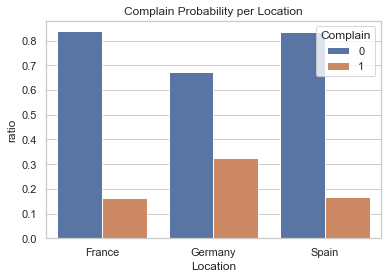

   Gender  Complain     ratio
0  Female         0  0.749007
1  Female         1  0.250993
2    Male         0  0.834925
3    Male         1  0.165075


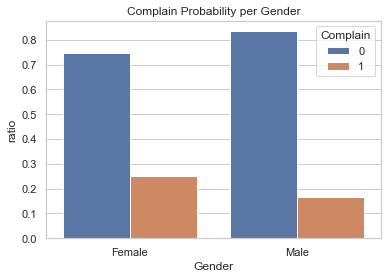

    Tenure  Complain     ratio
0        0         0  0.769417
1        0         1  0.230583
2        1         0  0.774879
3        1         1  0.225121
4        2         0  0.809160
5        2         1  0.190840
6        3         0  0.790258
7        3         1  0.209742
8        4         0  0.793103
9        4         1  0.206897
11       5         1  0.208127
10       5         0  0.791873
12       6         0  0.794819
13       6         1  0.205181
14       7         0  0.829102
15       7         1  0.170898
16       8         0  0.809198
17       8         1  0.190802
18       9         0  0.782299
19       9         1  0.217701
20      10         0  0.791837
21      10         1  0.208163


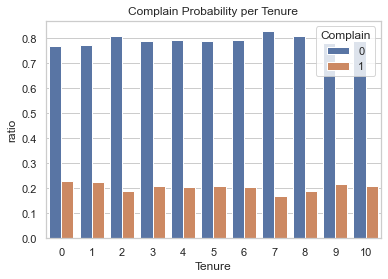

   NumOfProducts  Complain     ratio
0              1         0  0.723262
1              1         1  0.276738
2              2         0  0.922691
3              2         1  0.077309
4              3         1  0.826415
5              3         0  0.173585
6              4         1  1.000000


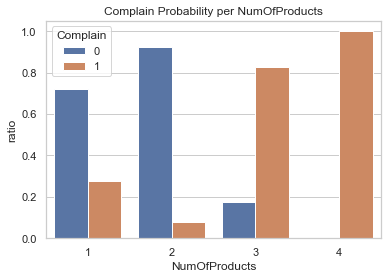

   HasCreditCard  Complain     ratio
0              0         0  0.791156
1              0         1  0.208844
2              1         0  0.797869
3              1         1  0.202131


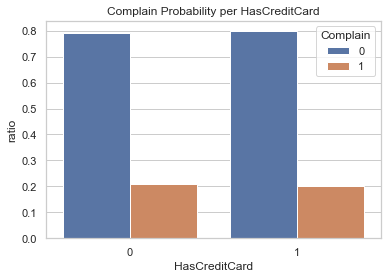

   IsActiveMember  Complain     ratio
0               0         0  0.731667
1               0         1  0.268333
2               1         0  0.856392
3               1         1  0.143608


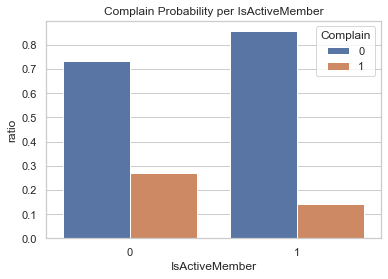

   Satisfaction Score  Complain     ratio
0                   1         0  0.799689
1                   1         1  0.200311
2                   2         0  0.782803
3                   2         1  0.217197
4                   3         0  0.800883
5                   3         1  0.199117
6                   4         0  0.795307
7                   4         1  0.204693
8                   5         0  0.800900
9                   5         1  0.199100


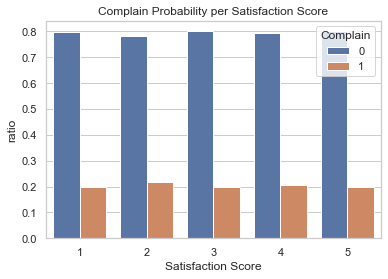

  Card Type  Complain     ratio
0   DIAMOND         0  0.782261
1   DIAMOND         1  0.217739
2      GOLD         0  0.806968
3      GOLD         1  0.193032
4  PLATINUM         0  0.795345
5  PLATINUM         1  0.204655
6    SILVER         0  0.799035
7    SILVER         1  0.200965


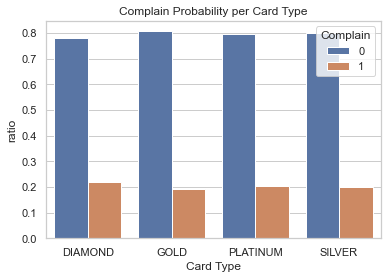

In [21]:
for i in ['Location', 'Gender', 'Tenure', 'NumOfProducts', 'HasCreditCard', 'IsActiveMember', 'Satisfaction Score', 'Card Type']:
    x = df.groupby([i])['Complain'].value_counts(normalize=True).to_frame().rename(columns={'Complain': 'ratio'}).reset_index().sort_values(i)
    print(x)
    sns.barplot(x=i, y='ratio', hue='Complain', data=x).set(title = f'Complain Probability per {i}')
    plt.show()

#### In addition to an age group described above, customers with the following charactreristics are more likely to complain:
 - location: Germany
 - gender: female
 - tenure: 1 and 2 years
 - NumOfProducts: more than 2 (3 and 4)
 - IsActiveMember: not active

### 4. Is there a significant differene between the credit scores of all the customers that have complained and those who have not in the period covered in the dataset?

Here we need to compare two groups of customers and find out if there's a significant difference between them in terms of credit scores.

Let's first take a look on the chart:

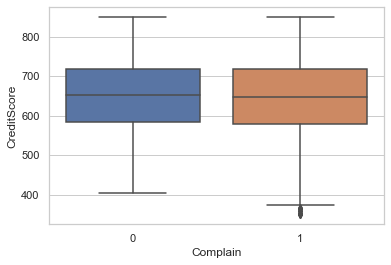

In [22]:
sns.boxplot(y='CreditScore', x='Complain', data=df)
plt.show()

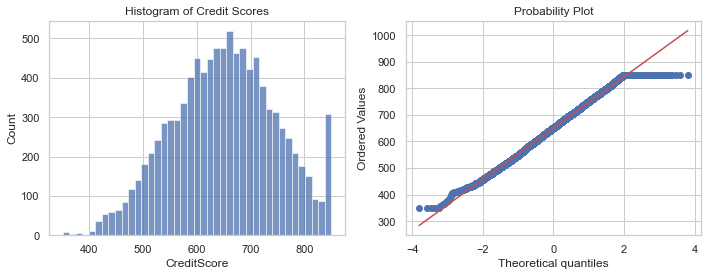

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(x='CreditScore', data=df, ax=axs[0])
axs[0].set_title('Histogram of Credit Scores')
axs[1] = stats.probplot(df['CreditScore'], plot=plt)
plt.tight_layout()
plt.show()

In [24]:
# Shapiro-Wilk test
_, p_value = stats.shapiro(df['CreditScore'])

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("The credit scores are not normally distributed.")
else:
    print("The credit scores are approximately normally distributed.")

The credit scores are not normally distributed.


In [25]:
from scipy.stats import ttest_ind, mannwhitneyu

credit_scores_left = df.loc[df['Complain'] == 1, 'CreditScore']
credit_scores_active = df.loc[df['Complain'] == 0, 'CreditScore']

# Perform Mann-Whitney U test
u_statistic, p_value_u = mannwhitneyu(credit_scores_left, credit_scores_active)

# Set the significance level
alpha = 0.05

# Compare the p-values to the significance level
if p_value_u < alpha:
    print("There is a significant difference between the credit scores of customers who left and those who are active (Mann-Whitney U test).")
else:
    print("There is no significant difference between the credit scores of customers who left and those who are active (Mann-Whitney U test).")


There is a significant difference between the credit scores of customers who left and those who are active (Mann-Whitney U test).


### 5. Do the satisfaction scores on complain resolution provide indication of the customers' likelihood of exiting the bank?

In [26]:
df['Satisfaction Score'].unique()

array([2, 3, 5, 4, 1], dtype=int64)

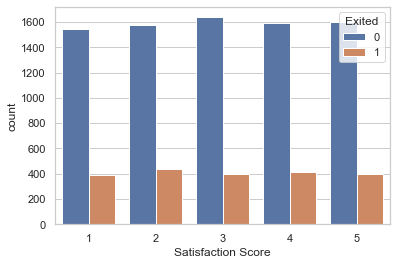

In [27]:
sns.countplot(x='Satisfaction Score', hue='Exited', data=df)
plt.show()

#### Create a contigency table:

In [28]:
cont_table = pd.crosstab(index=df['Satisfaction Score'], columns=df['Exited'])
cont_table

Exited,0,1
Satisfaction Score,,
1,1541,386
2,1574,438
3,1638,401
4,1592,411
5,1604,395


Now, performing a __Chi square__ test for contigency table we'll get the __p-value__. If it is less than __0.05__, then we can reject our __Null Hypothesys__ and accept __Alternative Hypothesys__.

In [29]:
from scipy.stats import chi2_contingency
res = chi2_contingency(cont_table)
res[1]

0.45190179543120956

#### To sum up: satisfaction scores on comlpain resolution don't provide indication of the customers' likelyhood of exiting the bank.

### 6. The bank has a reward system where the customers earn points when they use their Diamond, Gold, Silver, and PLatinum bank card. Determine if there is a significant difference in the average points earned by the different groups of customers.

In [30]:
df.groupby('Card Type')['Point Earned'].mean()

Card Type
DIAMOND     606.158210
GOLD        606.924309
PLATINUM    608.947833
SILVER      604.078778
Name: Point Earned, dtype: float64

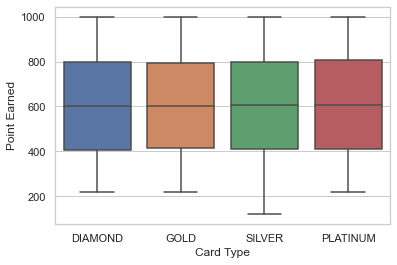

In [31]:
sns.boxplot(y='Point Earned', x='Card Type', data=df)
plt.show()

In [32]:
df.rename(columns={'Point Earned': 'Point_Earned', 'Card Type': 'Card_Type'}, inplace=True)

In [33]:
# the same ANOVA with Statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Point_Earned ~ Card_Type', data=df).fit() # set up the model
aov_table = sm.stats.anova_lm(mod, typ=2)

aov_table

,sum_sq,df,F,PR(>F)
Card_Type,3.025132e+04,3.0,0.197625,0.898059
Residual,5.090236e+08,9976.0,NaN,NaN


Here, the __F-statistics__ is 0.198 and __p-value__ is 0.898 which is greater than 0.05, so we can't reject the __Null Hypothesys__, meaning that there's no significant difference of average __Points earned__ between __Card Type__ groups of customers.

## Task B

### Develop a model to predict whether a customer will complain or not given the historical customer records in the __Main Sample__ file. Evaluate the developed model using appropriate metrics and report its performances accordingly. Remember to also discuss the implications of the performance (error or accuracy) of the model with respect to the banking business.

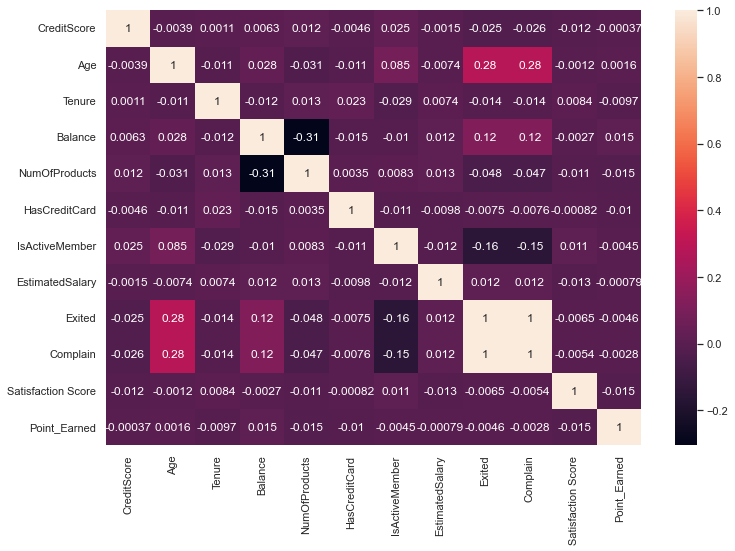

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Our target variable is 'Complain'. 


In [35]:
df.drop(['Complain', 'Satisfaction Score', 'Exited'], axis=1).corrwith(df['Complain']).sort_values(ascending=False)

Age                0.283140
Balance            0.119136
EstimatedSalary    0.011952
Point_Earned      -0.002812
HasCreditCard     -0.007592
Tenure            -0.013602
CreditScore       -0.025634
NumOfProducts     -0.047023
IsActiveMember    -0.154658
dtype: float64

In [36]:
df.drop(['Satisfaction Score', 'Exited'], axis=1, inplace=True)

#### We also have some categorical variables that have to be encoded to be able to use them in the model.

In [37]:
df = pd.get_dummies(df)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Complain,Point_Earned,Location_France,Location_Germany,Location_Spain,Gender_Female,Gender_Male,Card_Type_DIAMOND,Card_Type_GOLD,Card_Type_PLATINUM,Card_Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,425,0,0,1,1,0,0,1,0,0


#### Standardise/normalise our features, so that they are of similar scale

In [38]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point_Earned']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point_Earned']])

#### Let's distinguish our target variable from the features

In [39]:
X = df.drop('Complain', axis=1)
y = df[['Complain']]

#### There is imbalance in the classes - there are more 'not complained' customers rather than those who has 'complaint'. 

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority', random_state=42)

X_res, y_res = smote.fit_resample(X, y)

#### Let's now split the data for Test and Train parts

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

#### Test different Classification Models

In [42]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None, classifiers = 'all')
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:24<00:00,  2.92s/it]


In [43]:
models.sort_values('Accuracy',ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.91,0.91,0.91,0.91,2.01
XGBClassifier,0.91,0.91,0.91,0.91,2.12
LGBMClassifier,0.91,0.91,0.91,0.91,0.53
RandomForestClassifier,0.90,0.90,0.90,0.90,2.30
BaggingClassifier,0.88,0.88,0.88,0.88,0.70
LabelSpreading,0.87,0.87,0.87,0.87,18.70
LabelPropagation,0.87,0.87,0.87,0.87,15.44
AdaBoostClassifier,0.84,0.84,0.84,0.84,0.78
DecisionTreeClassifier,0.83,0.83,0.83,0.83,0.15


#### From all above tested models I will choose RandomForestClassifier as the main model to use

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [45]:
model = RandomForestClassifier(max_depth= 100, max_features = 'auto', min_samples_leaf = 1, n_estimators = 300, class_weight='balanced', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8996224040276903

#### Let's check what are the most important features

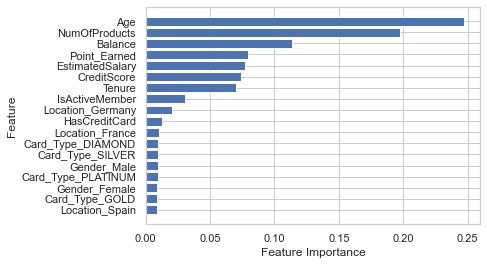

In [47]:
# Plot the feature importance
importance = model.feature_importances_
cols = X.columns

# Create a dataframe with feature importance values and feature names
df1 = pd.DataFrame({'Feature Importance': importance, 'Feature': cols})

# Sort the dataframe by feature importance in descending order
df1 = df1.sort_values(by='Feature Importance', ascending=True)

# Plot the bar chart
plt.barh(df1['Feature'], df1['Feature Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

#### Now let's analyze the results

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.89      0.91      0.90      1585

    accuracy                           0.90      3178
   macro avg       0.90      0.90      0.90      3178
weighted avg       0.90      0.90      0.90      3178



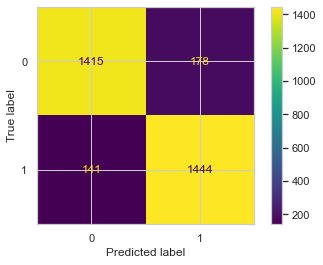

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
disp.plot();

#### Based on the confusion matrix, it is evident that the number of false predictions is low. Also, we see that the number of __false negative__ predictions is lower than the __false positive__ predictions. This outcome aligns with our objective when it comes to bank customer complaints. It is preferable to prioritize detecting potential complaints, even if it means paying more attention to certain customers, rather than missing someone who would raise a complaint.

## Task C

### Once the model is finalised, use it to predict whether the bank customers included in New Sample file, will complain about the banking services based on their profile information in the dataset.

To run the model on the new dataset, we first need to load this __New Sample__ dataset and make the same pre-processing steps as we did for the __Main Sample__

In [50]:
new_df = pd.read_csv('New Sample.csv')
new_df.head()

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,15710408,584,Spain,Female,38,3,0.00,2,1,1,4525.40,0,2,GOLD,941
1,15598695,834,Germany,Female,68,9,130169.27,2,0,1,93112.20,0,5,GOLD,882
2,15649354,754,Spain,Male,35,4,0.00,2,1,1,9658.41,0,1,SILVER,474
3,15737556,590,France,Male,43,7,81076.80,2,1,1,182627.25,1,1,DIAMOND,253
4,15671610,740,France,Male,36,7,0.00,1,1,1,13177.40,0,5,SILVER,466


In [51]:
new_df.columns

Index(['CustomerId', 'CreditScore', 'Location', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCreditCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [52]:
# remove columns that we don't need
new_df.drop(['CustomerId', 'Exited', 'Satisfaction Score'], axis=1, inplace=True)
new_df.rename(columns={'Point Earned': 'Point_Earned', 'Card Type': 'Card_Type'}, inplace=True)

In [53]:
new_df = pd.get_dummies(new_df)

In [54]:
# using the same scaler
new_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point_Earned']] = scaler.transform(new_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point_Earned']])

#### Now, let's run our trained model

In [55]:
new_df_pred = model.predict(new_df)

In [56]:
# this is the final array with predictions
new_df_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

# The actual value

# [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]